In [1]:
import pandas as pd
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


1. Show average resale price
2. Show average resale price of HDB in ANG MO KIO
3. Show standard deviation of resale price of HDB in ANG MO KIO
4. Create a new column named remaining_lease_group where the value is 'New' if remaining_lease > 70 and 'Old' if not. Then, visualize the total number of New vs Old in pie chart
5. Show total number of resale HDB in each town and visualize using bar plot
6. Show average resale price for each flat_type and visualize using bar plot
7. Show average resale price by remaining_lease_group and flat_type. Compare the difference between new and old group for each flat_type
8. Show how many 3 Room HDB in TAMPINES
9. Show the median price of HDB resale price over the lease_commence_date

In [3]:
#1 Show average resale price
df['resale_price'].mean()

436862.7890323795

In [4]:
#2 Show average resale price of HDB in ANG MO KIO
# df.groupby("town").mean() # Wrong Need Filtering

df[df['town']=='ANG MO KIO'] ['resale_price'].mean()

408422.98217179906

In [5]:
# 3 Show standard deviation of resale price of HDB in ANG MO KIO
# df.groupby("town").std() # WRONG need filtering

df[df['town']=='ANG MO KIO']['resale_price'].std()

136721.1419079911

In [6]:
# 4 Create a new column named remaining_lease_group where the value is 
# 'New' if remaining_lease > 70 and 'Old' if not. 
df['remaining_lease_group'] = np.where( df['remaining_lease']>70, 'NEW', 'OLD')
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,remaining_lease_group
37148,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,82,488000.0,NEW
37149,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,69,455000.0,OLD
37150,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,74,778000.0,NEW
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0,OLD
37152,2016-12,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,70,735000.0,OLD


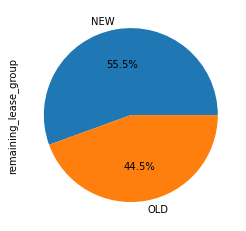

In [7]:
# 4 Then, visualize the total number of New vs Old in pie chart
df['remaining_lease_group'].value_counts().plot.pie(autopct='%.1f%%');

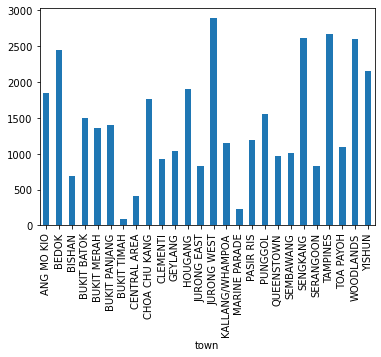

In [8]:
# 5 Show total number of resale HDB in each town and visualize using bar plot
df.groupby(['town']).size().plot.bar();

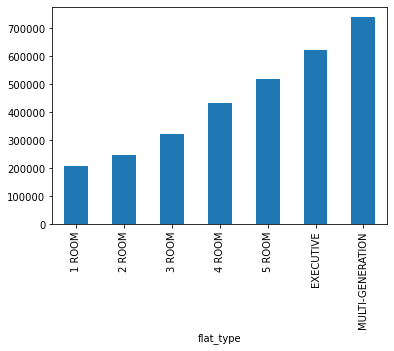

In [9]:
# 6 Show average resale price for each flat_type and visualize using bar plot
df.groupby(['flat_type']) ['resale_price'].mean().plot.bar();

In [10]:
# 7 Show average resale price by remaining_lease_group and flat_type.
#  Compare the difference between new and old group for each flat_type
q7 = df.groupby(['remaining_lease_group','flat_type']) ['resale_price'].mean()
q7

remaining_lease_group  flat_type       
NEW                    2 ROOM              258737.515152
                       3 ROOM              346103.050433
                       4 ROOM              440885.857386
                       5 ROOM              503047.493228
                       EXECUTIVE           609328.050558
                       MULTI-GENERATION    805000.000000
OLD                    1 ROOM              209714.285714
                       2 ROOM              243998.950355
                       3 ROOM              320815.228754
                       4 ROOM              420262.858771
                       5 ROOM              583360.225732
                       EXECUTIVE           677302.620438
                       MULTI-GENERATION    722750.000000
Name: resale_price, dtype: float64

In [11]:
q7.loc['NEW'] - q7.loc['OLD']

flat_type
1 ROOM                       NaN
2 ROOM              14738.564797
3 ROOM              25287.821680
4 ROOM              20622.998615
5 ROOM             -80312.732504
EXECUTIVE          -67974.569879
MULTI-GENERATION    82250.000000
Name: resale_price, dtype: float64

In [12]:
# 8 Show how many 3 Room HDB in TAMPINES
df.groupby(['town','flat_type']).size()['TAMPINES']['3 ROOM']

657

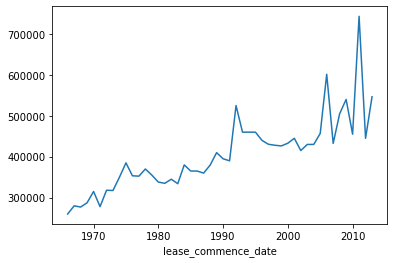

In [13]:
# 9 Show the median price of HDB resale price over the lease_commence_date
df.groupby('lease_commence_date') ['resale_price'].median().plot.line();